In [46]:
import csv
import matplotlib.pyplot as plt

In [47]:
def read_csv_values(file_path, row):
    values = []
    with open(file_path, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for i, line in enumerate(csvreader):
            if i == row:
                values.append(line)
    return values


In [81]:
csv_file_path = "mlp_singular_values.csv"
layers = {"full_network": [0,1,2], "pruned_network":[8,9,10], "random_network":[16,17,18]}
colors = {"full_network": (0.0, 0.0, 1.0, 0.01), "pruned_network": (0.0, 1.0, 0.0, 1), "random_network": (1.0, 0.0, 0.0, 0.6)}


In [42]:
singular_values = {}
for layer, rows in layers.items():

    sv = []
    for row in rows:
        values = read_csv_values(csv_file_path, row)
        sv.extend(values[0])
    singular_values[layer] = sv

In [64]:
# convert the singular values to floats
float_sv = {}
for network, sv in singular_values.items():
    float_sv[network] = [float(value) for value in sv]
    
min_value = min(min(values) for values in float_sv.values())
max_value = max(max(values) for values in float_sv.values())

num_bins = 200
bins = [min_value + i * (max_value- min_value) / num_bins for i in range(num_bins+1)]

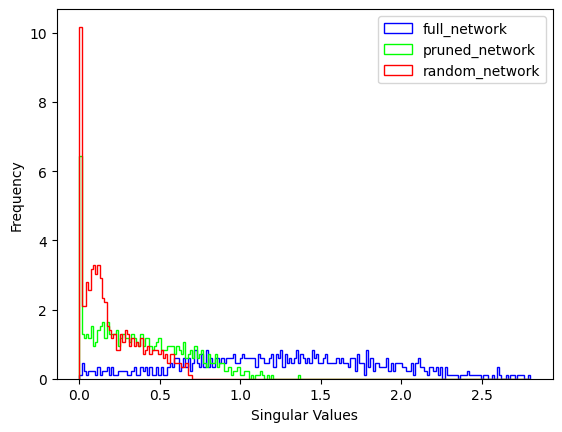

In [85]:
for network, values in float_sv.items():
    plt.hist(values, bins=bins, alpha=1, color=colors[network], label=network, histtype=u'step', density=True)

# Add x-axis and y-axis labels
plt.xlabel("Singular Values")
plt.ylabel("Frequency")

# Add a legend
plt.legend(loc='upper right')

# Display the plot
plt.show()